# 1. Read trajectory data

In [1]:
import pandas as pd
import geopandas as gp
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
HEADER=['device_key', 'date_time', 'unix_time', 'visit_centroid_lat',
       'visit_centroid_lon']

In [3]:
d=[]
for i in range(19,27):
    print(i)
    #d1=pd.read_csv('./Data/unattributed_march2021/landmark_v4_1/csv/fact_unattributed_visit/dt=20210301/part-0000'+str(i)+'-149b3b1a-4455-4e48-9236-645f0600f77b-c000.csv.gz',header=None)
    d1=pd.read_csv('D:\\GNN\data2021\\dt=202107'+str(i)+'.csv')
    d1.columns=HEADER
    d.append(d1)

19
20
21
22
23
24
25
26


In [4]:
d1.head()

,device_key,date_time,unix_time,visit_centroid_lat,visit_centroid_lon
0,135639630656,2021-07-25 19:45:09,1627260309,44.748800,-93.286200
1,21673451423,2021-07-26 15:49:49,1627332589,44.748303,-93.288770
2,109732336542,2021-07-26 10:59:47,1627315187,44.747275,-93.294120
3,120055669424,2021-07-26 10:25:36,1627313136,44.746600,-93.293500
4,122783610155,2021-07-26 14:03:42,1627326222,44.747127,-93.294445


In [5]:
d1=pd.concat(d) # whole day 2021/03/01
d1.reset_index(inplace=True)
d1.drop('index',axis=1,inplace=True)
#d1['date_time'] = [datetime.fromtimestamp(x) for x in d1['unix_time']]
date = d1['date_time']
d1.drop(labels=['date_time'], axis=1, inplace = True)
d1.insert(1, 'date_time', date)

In [6]:
d1

,device_key,date_time,unix_time,visit_centroid_lat,visit_centroid_lon
0,34671178977,2021-07-19 12:21:58,1626715318,45.057000,-92.863200
1,50655906051,2021-07-19 09:29:01,1626704941,45.049300,-92.901000
2,135572777951,2021-07-19 18:46:02,1626738362,45.041800,-92.883500
3,63685434257,2021-07-19 13:02:24,1626717744,45.057700,-92.863400
4,135658211129,2021-07-19 13:28:25,1626719305,45.041738,-92.903373
...,...,...,...,...,...
10164293,135690783845,2021-07-26 06:00:31,1627297231,45.020500,-93.306400
10164294,82183005157,2021-07-26 08:32:11,1627306331,44.861093,-93.455937
10164295,127524760817,2021-07-26 02:05:54,1627283154,44.851385,-93.452495
10164296,122006737590,2021-07-26 13:50:57,1627325457,44.955600,-93.282300


In [7]:
d1['device_key'].value_counts()

132547683861    1196
49925987488      933
121271722918     895
132267328656     895
123766073237     875
                ... 
134508920900       1
39720360895        1
83586806580        1
104325124601       1
135663211727       1
Name: device_key, Length: 166850, dtype: int64

In [8]:
user1=d1.query('device_key==132547683861').sort_values('unix_time')

In [9]:
user1

,device_key,date_time,unix_time,visit_centroid_lat,visit_centroid_lon
639401,132547683861,2021-07-19 05:10:56,1626689456,45.141600,-93.258100
774673,132547683861,2021-07-19 05:16:56,1626689816,45.107814,-93.334352
66378,132547683861,2021-07-19 06:12:39,1626693159,45.126500,-93.337200
479951,132547683861,2021-07-19 06:30:57,1626694257,45.102176,-93.400796
921510,132547683861,2021-07-19 07:15:44,1626696944,45.137800,-93.409800
...,...,...,...,...,...
9130521,132547683861,2021-07-26 15:39:52,1627331992,45.108500,-93.356500
9575786,132547683861,2021-07-26 15:42:07,1627332127,45.107817,-93.334105
9931536,132547683861,2021-07-26 15:58:41,1627333121,45.109125,-93.304284
9970791,132547683861,2021-07-26 16:10:15,1627333815,45.108700,-93.302900


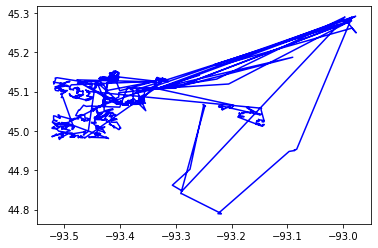

In [10]:
plt.plot(user1.visit_centroid_lon,user1.visit_centroid_lat,linestyle='-',color='blue')

# 2.read CBG data

In [11]:
import os
import geopandas as gpd

cbg_path='D:\\GNN\\sample_data_mn_20200301-20220424T172614Z-001\\sample_data_mn_20200301\\'

cbg = gpd.read_file(cbg_path+"geo/cbg_TCMA.geojson")

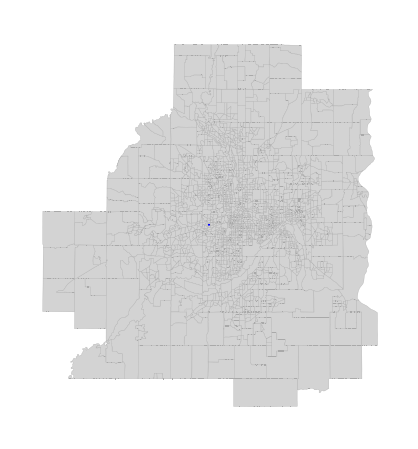

In [12]:
import geoplot
import geoplot.crs as gcrs

geoplot.polyplot(cbg, projection=gcrs.AlbersEqualArea(), edgecolor='darkgrey', facecolor='lightgrey', linewidth=.3,
    figsize=(12, 8))
plt.plot(user1.visit_centroid_lon,user1.visit_centroid_lat,linestyle='-',color='blue')

In [13]:
gdf_user1 = gpd.GeoDataFrame(
    user1, geometry=gpd.points_from_xy(user1.visit_centroid_lon, user1.visit_centroid_lat))

In [14]:
gdf_user1

,device_key,date_time,unix_time,visit_centroid_lat,visit_centroid_lon,geometry
639401,132547683861,2021-07-19 05:10:56,1626689456,45.141600,-93.258100,POINT (-93.25810 45.14160)
774673,132547683861,2021-07-19 05:16:56,1626689816,45.107814,-93.334352,POINT (-93.33435 45.10781)
66378,132547683861,2021-07-19 06:12:39,1626693159,45.126500,-93.337200,POINT (-93.33720 45.12650)
479951,132547683861,2021-07-19 06:30:57,1626694257,45.102176,-93.400796,POINT (-93.40080 45.10218)
921510,132547683861,2021-07-19 07:15:44,1626696944,45.137800,-93.409800,POINT (-93.40980 45.13780)
...,...,...,...,...,...,...
9130521,132547683861,2021-07-26 15:39:52,1627331992,45.108500,-93.356500,POINT (-93.35650 45.10850)
9575786,132547683861,2021-07-26 15:42:07,1627332127,45.107817,-93.334105,POINT (-93.33411 45.10782)
9931536,132547683861,2021-07-26 15:58:41,1627333121,45.109125,-93.304284,POINT (-93.30428 45.10913)
9970791,132547683861,2021-07-26 16:10:15,1627333815,45.108700,-93.302900,POINT (-93.30290 45.10870)


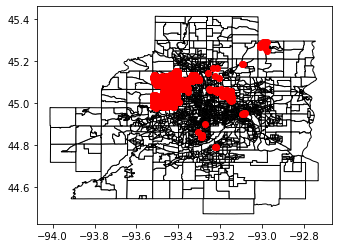

In [15]:
ax = cbg.plot(
    color='white', edgecolor='black')

gdf_user1.plot(ax=ax, color='red')


In [16]:
gdf_d1= gpd.GeoDataFrame(
    d1, geometry=gpd.points_from_xy(d1.visit_centroid_lon, d1.visit_centroid_lat))

In [18]:
#ax = cbg.plot(
   # color='white', edgecolor='black')

#gdf_d1.plot(ax=ax, color='red')


In [17]:
gdf_d1

,device_key,date_time,unix_time,visit_centroid_lat,visit_centroid_lon,geometry
0,34671178977,2021-07-19 12:21:58,1626715318,45.057000,-92.863200,POINT (-92.86320 45.05700)
1,50655906051,2021-07-19 09:29:01,1626704941,45.049300,-92.901000,POINT (-92.90100 45.04930)
2,135572777951,2021-07-19 18:46:02,1626738362,45.041800,-92.883500,POINT (-92.88350 45.04180)
3,63685434257,2021-07-19 13:02:24,1626717744,45.057700,-92.863400,POINT (-92.86340 45.05770)
4,135658211129,2021-07-19 13:28:25,1626719305,45.041738,-92.903373,POINT (-92.90337 45.04174)
...,...,...,...,...,...,...
10164293,135690783845,2021-07-26 06:00:31,1627297231,45.020500,-93.306400,POINT (-93.30640 45.02050)
10164294,82183005157,2021-07-26 08:32:11,1627306331,44.861093,-93.455937,POINT (-93.45594 44.86109)
10164295,127524760817,2021-07-26 02:05:54,1627283154,44.851385,-93.452495,POINT (-93.45250 44.85138)
10164296,122006737590,2021-07-26 13:50:57,1627325457,44.955600,-93.282300,POINT (-93.28230 44.95560)


In [18]:
cbg

,StateFIPS,CountyFIPS,TractCode,BlockGroup,CensusBlockGroup,State,County,ClassCode,geometry
0,27,019,091100,1,270190911001,MN,Carver County,H1,"MULTIPOLYGON (((-93.76804 44.64280, -93.76804 ..."
1,27,019,091201,1,270190912011,MN,Carver County,H1,"MULTIPOLYGON (((-94.01048 44.71880, -94.01047 ..."
2,27,019,090800,2,270190908002,MN,Carver County,H1,"MULTIPOLYGON (((-93.61734 44.83011, -93.61261 ..."
3,27,019,090100,2,270190901002,MN,Carver County,H1,"MULTIPOLYGON (((-93.88993 44.97638, -93.88990 ..."
4,27,019,090302,1,270190903021,MN,Carver County,H1,"MULTIPOLYGON (((-93.88203 44.80464, -93.87963 ..."
...,...,...,...,...,...,...,...,...,...
2080,27,053,006800,2,270530068002,MN,Hennepin County,H1,"MULTIPOLYGON (((-93.28803 44.95733, -93.28802 ..."
2081,27,053,026807,3,270530268073,MN,Hennepin County,H1,"MULTIPOLYGON (((-93.39212 45.07971, -93.39195 ..."
2082,27,053,022102,2,270530221022,MN,Hennepin County,H1,"MULTIPOLYGON (((-93.38369 44.95686, -93.38120 ..."
2083,27,053,100700,4,270531007004,MN,Hennepin County,H1,"MULTIPOLYGON (((-93.31335 45.01867, -93.31208 ..."


In [19]:
len(cbg.CensusBlockGroup.unique())

2085

In [20]:
cbg.head()

,StateFIPS,CountyFIPS,TractCode,BlockGroup,CensusBlockGroup,State,County,ClassCode,geometry
0,27,019,091100,1,270190911001,MN,Carver County,H1,"MULTIPOLYGON (((-93.76804 44.64280, -93.76804 ..."
1,27,019,091201,1,270190912011,MN,Carver County,H1,"MULTIPOLYGON (((-94.01048 44.71880, -94.01047 ..."
2,27,019,090800,2,270190908002,MN,Carver County,H1,"MULTIPOLYGON (((-93.61734 44.83011, -93.61261 ..."
3,27,019,090100,2,270190901002,MN,Carver County,H1,"MULTIPOLYGON (((-93.88993 44.97638, -93.88990 ..."
4,27,019,090302,1,270190903021,MN,Carver County,H1,"MULTIPOLYGON (((-93.88203 44.80464, -93.87963 ..."


In [21]:
gdf_d1.head()

,device_key,date_time,unix_time,visit_centroid_lat,visit_centroid_lon,geometry
0,34671178977,2021-07-19 12:21:58,1626715318,45.057000,-92.863200,POINT (-92.86320 45.05700)
1,50655906051,2021-07-19 09:29:01,1626704941,45.049300,-92.901000,POINT (-92.90100 45.04930)
2,135572777951,2021-07-19 18:46:02,1626738362,45.041800,-92.883500,POINT (-92.88350 45.04180)
3,63685434257,2021-07-19 13:02:24,1626717744,45.057700,-92.863400,POINT (-92.86340 45.05770)
4,135658211129,2021-07-19 13:28:25,1626719305,45.041738,-92.903373,POINT (-92.90337 45.04174)


In [22]:
gdf_d1.crs= "EPSG:4326" 
gdf_d1=gdf_d1.to_crs(cbg.crs)
points_with_cbg = gpd.sjoin(gdf_d1, cbg, how="inner")

In [23]:
#points_with_cbg['CensusBlockGroup'].shift(-1).head()
points_with_cbg['CensusBlockGroup'].head()

0    271630704034
1    271630704034
2    271630704034
3    271630704034
4    271630704034
Name: CensusBlockGroup, dtype: object

In [24]:
points_with_cbg.head()

,device_key,date_time,unix_time,visit_centroid_lat,visit_centroid_lon,geometry,index_right,StateFIPS,CountyFIPS,TractCode,BlockGroup,CensusBlockGroup,State,County,ClassCode
0,34671178977,2021-07-19 12:21:58,1626715318,45.057000,-92.863200,POINT (-92.86320 45.05700),1212,27,163,070403,4,271630704034,MN,Washington County,H1
1,50655906051,2021-07-19 09:29:01,1626704941,45.049300,-92.901000,POINT (-92.90100 45.04930),1212,27,163,070403,4,271630704034,MN,Washington County,H1
2,135572777951,2021-07-19 18:46:02,1626738362,45.041800,-92.883500,POINT (-92.88350 45.04180),1212,27,163,070403,4,271630704034,MN,Washington County,H1
3,63685434257,2021-07-19 13:02:24,1626717744,45.057700,-92.863400,POINT (-92.86340 45.05770),1212,27,163,070403,4,271630704034,MN,Washington County,H1
4,135658211129,2021-07-19 13:28:25,1626719305,45.041738,-92.903373,POINT (-92.90337 45.04174),1212,27,163,070403,4,271630704034,MN,Washington County,H1


In [26]:
points_with_cbg_od=[]

length=len(points_with_cbg.device_key.unique())
i=0
for id in points_with_cbg.device_key.unique():
    if((100*i/length)%1==0):  
        print(100*i/length)   
    user=points_with_cbg.query('device_key==@id').sort_values('unix_time')
    user['CBG_last']=user['CensusBlockGroup'].shift(1)
    user['OD']=user['CBG_last']+','+user['CensusBlockGroup']
    points_with_cbg_od.append(user)
    i=i+1
    #print(i)

0.0
2.0
4.0
6.0
8.0
10.0
12.0
14.0
16.0
18.0
20.0
22.0
24.0
26.0
28.0
30.0
32.0
34.0
36.0
38.0
40.0
42.0
44.0
46.0
48.0
50.0
52.0
54.0
56.0
58.0
60.0
62.0
64.0
66.0
68.0
70.0
72.0
74.0
76.0
78.0
80.0
82.0
84.0
86.0
88.0
90.0
92.0
94.0
96.0
98.0


In [28]:
points_with_cbg_od=[]

length=len(points_with_cbg.device_key.unique())
i=0
for id in points_with_cbg.device_key.unique():
    if((100*i/length)%1==0):  
        print("The percentage is:",100*i/length)
  #  if(i%1000==0):  
   #     print("The number of users is:",i)  
    user=points_with_cbg.query('device_key==@id').sort_values('unix_time')
    user['CBG_last']=user['CensusBlockGroup'].shift(1)
    user['OD']=user['CBG_last']+','+user['CensusBlockGroup']
    points_with_cbg_od.append(user)
    i=i+1

The percentage is: 0.0
The percentage is: 2.0
The percentage is: 4.0
The percentage is: 6.0
The percentage is: 8.0
The percentage is: 10.0
The percentage is: 12.0
The percentage is: 14.0
The percentage is: 16.0
The percentage is: 18.0
The percentage is: 20.0
The percentage is: 22.0
The percentage is: 24.0
The percentage is: 26.0
The percentage is: 28.0
The percentage is: 30.0
The percentage is: 32.0
The percentage is: 34.0
The percentage is: 36.0
The percentage is: 38.0
The percentage is: 40.0
The percentage is: 42.0
The percentage is: 44.0
The percentage is: 46.0
The percentage is: 48.0
The percentage is: 50.0
The percentage is: 52.0
The percentage is: 54.0
The percentage is: 56.0
The percentage is: 58.0
The percentage is: 60.0
The percentage is: 62.0
The percentage is: 64.0
The percentage is: 66.0
The percentage is: 68.0
The percentage is: 70.0
The percentage is: 72.0
The percentage is: 74.0
The percentage is: 76.0
The percentage is: 78.0
The percentage is: 80.0
The percentage is: 82

In [42]:
points_with_cbg_od_all=pd.concat(points_with_cbg_od) # whole weeks 


In [43]:
points_with_cbg_od_all.head()
points_with_cbg_od_all.to_csv('points_with_cbg_od_all_0316.csv')

In [45]:
Data=pd.read_csv('points_with_cbg_od_all_0316.csv')
Data

,Unnamed: 0,device_key,date_time,unix_time,visit_centroid_lat,visit_centroid_lon,geometry,index_right,StateFIPS,CountyFIPS,TractCode,BlockGroup,CensusBlockGroup,State,County,ClassCode,CBG_last,OD
0,1002934,34671178977,2021-07-19 06:48:25,1626695305,45.052000,-92.839300,POINT (-92.8393 45.052),1226,27,163,70601,1,271630706011,MN,Washington County,H1,NaN,NaN
1,330507,34671178977,2021-07-19 06:53:50,1626695630,45.029600,-92.853000,POINT (-92.853 45.0296),245,27,163,70701,1,271630707011,MN,Washington County,H1,2.716307e+11,"271630706011,271630707011"
2,874766,34671178977,2021-07-19 06:54:19,1626695659,45.029088,-92.850725,POINT (-92.850725 45.02908833333333),245,27,163,70701,1,271630707011,MN,Washington County,H1,2.716307e+11,"271630707011,271630707011"
3,650234,34671178977,2021-07-19 07:04:16,1626696256,45.050900,-92.837900,POINT (-92.8379 45.0509),1226,27,163,70601,1,271630706011,MN,Washington County,H1,2.716307e+11,"271630707011,271630706011"
4,1135534,34671178977,2021-07-19 07:05:03,1626696303,45.053300,-92.839200,POINT (-92.8392 45.0533),1226,27,163,70601,1,271630706011,MN,Washington County,H1,2.716307e+11,"271630706011,271630706011"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10164293,3647768,109981915039,2021-07-21 15:44:03,1626900243,44.873937,-93.453584,POINT (-93.45358444444445 44.87393666666666),475,27,53,26006,1,270530260061,MN,Hennepin County,H1,2.705303e+11,"270530260061,270530260061"
10164294,4227763,109981915039,2021-07-22 09:17:56,1626963476,44.874106,-93.453340,POINT (-93.45334 44.874106),475,27,53,26006,1,270530260061,MN,Hennepin County,H1,2.705303e+11,"270530260061,270530260061"
10164295,4358782,109981915039,2021-07-22 13:21:40,1626978100,44.874000,-93.453300,POINT (-93.4533 44.873999999999995),475,27,53,26006,1,270530260061,MN,Hennepin County,H1,2.705303e+11,"270530260061,270530260061"
10164296,6315475,109981915039,2021-07-22 20:01:42,1627002102,44.874060,-93.453337,POINT (-93.45333666666666 44.87406000000001),475,27,53,26006,1,270530260061,MN,Hennepin County,H1,2.705303e+11,"270530260061,270530260061"


In [46]:
Data.head()

,Unnamed: 0,device_key,date_time,unix_time,visit_centroid_lat,visit_centroid_lon,geometry,index_right,StateFIPS,CountyFIPS,TractCode,BlockGroup,CensusBlockGroup,State,County,ClassCode,CBG_last,OD
0,1002934,34671178977,2021-07-19 06:48:25,1626695305,45.052000,-92.839300,POINT (-92.8393 45.052),1226,27,163,70601,1,271630706011,MN,Washington County,H1,NaN,NaN
1,330507,34671178977,2021-07-19 06:53:50,1626695630,45.029600,-92.853000,POINT (-92.853 45.0296),245,27,163,70701,1,271630707011,MN,Washington County,H1,2.716307e+11,"271630706011,271630707011"
2,874766,34671178977,2021-07-19 06:54:19,1626695659,45.029088,-92.850725,POINT (-92.850725 45.02908833333333),245,27,163,70701,1,271630707011,MN,Washington County,H1,2.716307e+11,"271630707011,271630707011"
3,650234,34671178977,2021-07-19 07:04:16,1626696256,45.050900,-92.837900,POINT (-92.8379 45.0509),1226,27,163,70601,1,271630706011,MN,Washington County,H1,2.716307e+11,"271630707011,271630706011"
4,1135534,34671178977,2021-07-19 07:05:03,1626696303,45.053300,-92.839200,POINT (-92.8392 45.0533),1226,27,163,70601,1,271630706011,MN,Washington County,H1,2.716307e+11,"271630706011,271630706011"


In [47]:
points_with_cbg_od_all.head()

,device_key,date_time,unix_time,visit_centroid_lat,visit_centroid_lon,geometry,index_right,StateFIPS,CountyFIPS,TractCode,BlockGroup,CensusBlockGroup,State,County,ClassCode,CBG_last,OD
1002934,34671178977,2021-07-19 06:48:25,1626695305,45.052000,-92.839300,POINT (-92.83930 45.05200),1226,27,163,070601,1,271630706011,MN,Washington County,H1,NaN,NaN
330507,34671178977,2021-07-19 06:53:50,1626695630,45.029600,-92.853000,POINT (-92.85300 45.02960),245,27,163,070701,1,271630707011,MN,Washington County,H1,271630706011,"271630706011,271630707011"
874766,34671178977,2021-07-19 06:54:19,1626695659,45.029088,-92.850725,POINT (-92.85072 45.02909),245,27,163,070701,1,271630707011,MN,Washington County,H1,271630707011,"271630707011,271630707011"
650234,34671178977,2021-07-19 07:04:16,1626696256,45.050900,-92.837900,POINT (-92.83790 45.05090),1226,27,163,070601,1,271630706011,MN,Washington County,H1,271630707011,"271630707011,271630706011"
1135534,34671178977,2021-07-19 07:05:03,1626696303,45.053300,-92.839200,POINT (-92.83920 45.05330),1226,27,163,070601,1,271630706011,MN,Washington County,H1,271630706011,"271630706011,271630706011"


In [75]:
#s_week=''
mask_work=(points_with_cbg_od_all['date_time']<'2021-07-23-00:00:00')&(points_with_cbg_od_all['date_time']>='2021-07-18-00:00:00')
mask_weekend=(points_with_cbg_od_all['date_time']<'2021-07-26-00:00:00')&(points_with_cbg_od_all['date_time']>='2021-07-23-00:00:00')


In [76]:
points_work=points_with_cbg_od_all.loc[mask_work]
points_weekend=points_with_cbg_od_all.loc[mask_weekend]


In [77]:
print(points_work.date_time.min())

print(points_work.date_time.max())

2021-07-19 00:00:00
2021-07-23 23:59:59


In [74]:
print(points_weekend.date_time.min())
print(points_weekend.date_time.max())

2021-07-24 00:00:00
2021-07-26 18:59:59


In [78]:
OD_work=points_work['OD'].value_counts()
OD_weekend=points_weekend['OD'].value_counts()


In [79]:
OD_work.to_csv('OD_work.csv')
OD_weekend.to_csv('OD_weekend.csv')

In [83]:
OD_work

270539800001,270539800001    72339
270530251002,270530251002    53934
270530269092,270530269092    38522
271390803012,271390803012    35335
271390803011,271390803011    22955
                             ...  
270030507092,270030505054        1
270370601023,270370607351        1
270531256002,270530006012        1
270370607282,270370605033        1
271230406045,271230319001        1
Name: OD, Length: 512655, dtype: int64

In [84]:
OD_weekend

270530251002,270530251002    40575
270539800001,270539800001    39559
271390803012,271390803012    24861
270530269092,270530269092    17164
271390803011,271390803011    11448
                             ...  
271230409012,270530268122        1
270530249011,270531052041        1
271630710161,271230424012        1
271230411073,270030502204        1
271630706011,271630714004        1
Name: OD, Length: 366781, dtype: int64

In [ ]:
str(OD.index[0]).split(',')[0]

In [85]:
OD_weekend.shape

(366781,)

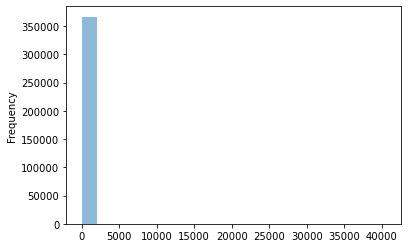

In [123]:
OD_weekend.plot.hist(bins=20,alpha=0.5)

In [91]:
uniqueID=points_with_cbg_od_all['CensusBlockGroup'].unique()
uniqueID.sort()
#uniqueID.shape
key=range(0,2085)
dic_id = dict(zip(key, uniqueID))
dic_id_new = dict([(value, key) for (key, value) in dic_id.items()])


In [97]:
OD_weekend

270530251002,270530251002    40575
270539800001,270539800001    39559
271390803012,271390803012    24861
270530269092,270530269092    17164
271390803011,271390803011    11448
                             ...  
271230409012,270530268122        1
270530249011,270531052041        1
271630710161,271230424012        1
271230411073,270030502204        1
271630706011,271630714004        1
Name: OD, Length: 366781, dtype: int64

In [92]:
len(dic_id_new)

2085

In [104]:
def GenarateOD(OD):
    OD_list=[[] for i in range(len(OD))]
    
    for i in range(0,len(OD)):
        OD_list[i].append(OD.index[i].split(',')[0])
        OD_list[i].append(OD.index[i].split(',')[1])
        OD_list[i].append(OD[i])
    OD_pd=pd.DataFrame(OD_list,columns=['O','D','flow'])
    return OD_pd

In [107]:
OD_weekend_pd=GenarateOD(OD_weekend)
OD_work_pd=GenarateOD(OD_work)

In [ ]:
#OD_pd['flow']

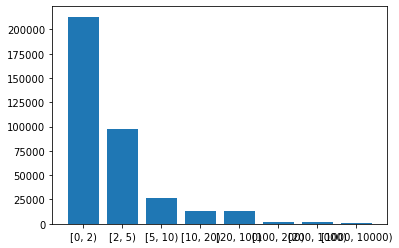

In [108]:
bins=[0,2,5,10,20,100,200,1000,10000]
segments=pd.cut(OD_weekend_pd['flow'],bins,right=False)
counts=pd.value_counts(segments,sort=False)
b=plt.bar(counts.index.astype(str),counts)
plt.show()

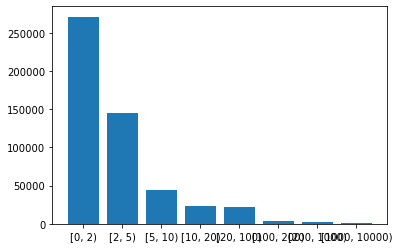

In [109]:
bins=[0,2,5,10,20,100,200,1000,10000]
segments=pd.cut(OD_work_pd['flow'],bins,right=False)
counts=pd.value_counts(segments,sort=False)
b=plt.bar(counts.index.astype(str),counts)
plt.show()

In [ ]:
OD_pd.to_csv('OD_pd.csv')

In [124]:
OD_weekend_pd

,O,D,flow,O_id,D_id
0,270530251002,270530251002,40575,861,861
1,270539800001,270539800001,39559,1485,1485
2,271390803012,271390803012,24861,1905,1905
3,270530269092,270530269092,17164,1159,1159
4,271390803011,271390803011,11448,1904,1904
...,...,...,...,...,...
366776,271230409012,270530268122,1,1780,1113
366777,270530249011,270531052041,1,854,1310
366778,271630710161,271230424012,1,2054,1852
366779,271230411073,270030502204,1,1798,41


In [110]:
OD_weekend_pd['O_id']=OD_weekend_pd.O.map(dic_id_new)
OD_weekend_pd['D_id']=OD_weekend_pd.D.map(dic_id_new)


In [112]:
OD_work_pd['O_id']=OD_work_pd.O.map(dic_id_new)
OD_work_pd['D_id']=OD_work_pd.D.map(dic_id_new)

In [125]:
OD_weekend_pd=OD_weekend_pd.query('flow>10')
OD_work_pd=OD_work_pd.query('flow>10')

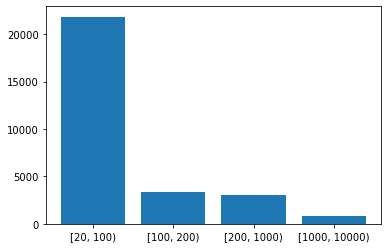

In [127]:
bins=[20,100,200,1000,10000]
segments=pd.cut(OD_work_pd['flow'],bins,right=False)
counts=pd.value_counts(segments,sort=False)
b=plt.bar(counts.index.astype(str),counts)
plt.show()

In [129]:


OD_weekend_pd.to_csv('OD_weekend_pd.csv')
OD_work_pd.to_csv('OD_work_pd.csv')


In [ ]:
type(dic_id_new)

In [ ]:
dic_id_list=[dic_id_new]
pd.DataFrame(dic_id_list).T.to_csv('dic_id.csv')

In [ ]:
dic_id_list

In [114]:
OD_work_pd

,O,D,flow,O_id,D_id
0,270539800001,270539800001,72339,1485,1485
1,270530251002,270530251002,53934,861,861
2,270530269092,270530269092,38522,1159,1159
3,271390803012,271390803012,35335,1905,1905
4,271390803011,271390803011,22955,1904,1904
...,...,...,...,...,...
512650,270030507092,270030505054,1,125,88
512651,270370601023,270370607351,1,287,391
512652,270531256002,270530006012,1,1465,527
512653,270370607282,270370605033,1,374,322


In [121]:
len(OD_weekend_pd.D.unique())

2085

In [122]:
len(OD_work_pd.D.unique())

2085